# Stochastic processes course 2018/2019-2 @ ELTE
# Assignment 8-9: Graph theory
## 04.19.2019

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import os
import random
import seaborn as sns
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import statistics

sns.set_style(style='whitegrid')

image_path = '.\\Documentation\\src\\images\\'
image_format = 'pdf'
image_dpi = 150

# Random Recursive Tree

In [2]:
def random_recursive_tree(n_edges_rrt):
    
    # Storage for edges
    # Nth elements indicates the Nth edge
    # It connects the (N+2)th point with the point indicated by its value
    #
    # That means, that the first value of the graph_rrt array, with index "0",
    # indicates the edge between the 1. and 2. points, and thus its value is "1."
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_rrt+1)
    graph_rrt = np.zeros((n_edges_rrt+1), dtype='int')
    
    # Degrees of vertices
    # Nth elements indicates the degree of the (N+1)th point
    #
    # Points are indexed from "1", but the first point is indicated
    # by the "0" index of the count_rrt array
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_rrt+1)
    count_rrt = np.zeros((n_edges_rrt+1), dtype='int')
    
    # Total number of vertices with specific degrees
    # Nth element indicates the number of vertices
    # with N degrees
    #
    # Length: Number of maximum possible degrees, which equals to number of edges (n_edges_rrt)
    # +1 for zero degree
    dist_rrt = np.zeros((n_edges_rrt+1), dtype='int')
    
    # Initial conditions:
    # One point, with no edges
    dist_rrt[0] = n_edges_rrt+1  # All of the points have 0 degree yet
    
    for i in range(0, n_edges_rrt):
        
        # Choose randomly an endpoint for the edge, brought into the graph by the new vertex
        choosen_random = random.randint(1, i+1)
        graph_rrt[i] = choosen_random
        
        # Increment the degrees of the two connected point
        count_rrt[choosen_random - 1] += 1
        count_rrt[i + 1] += 1

        # Update distributions
        dist_rrt[count_rrt[choosen_random - 1]] += 1
        dist_rrt[count_rrt[i + 1]] += 1
        dist_rrt[count_rrt[choosen_random - 1] - 1] -= 1
        dist_rrt[count_rrt[i + 1] - 1] -= 1
        
    return(graph_rrt, count_rrt, dist_rrt)

In [3]:
n_edges_rrt = 100
graph_rrt, count_rrt, dist_rrt = random_recursive_tree(n_edges_rrt)

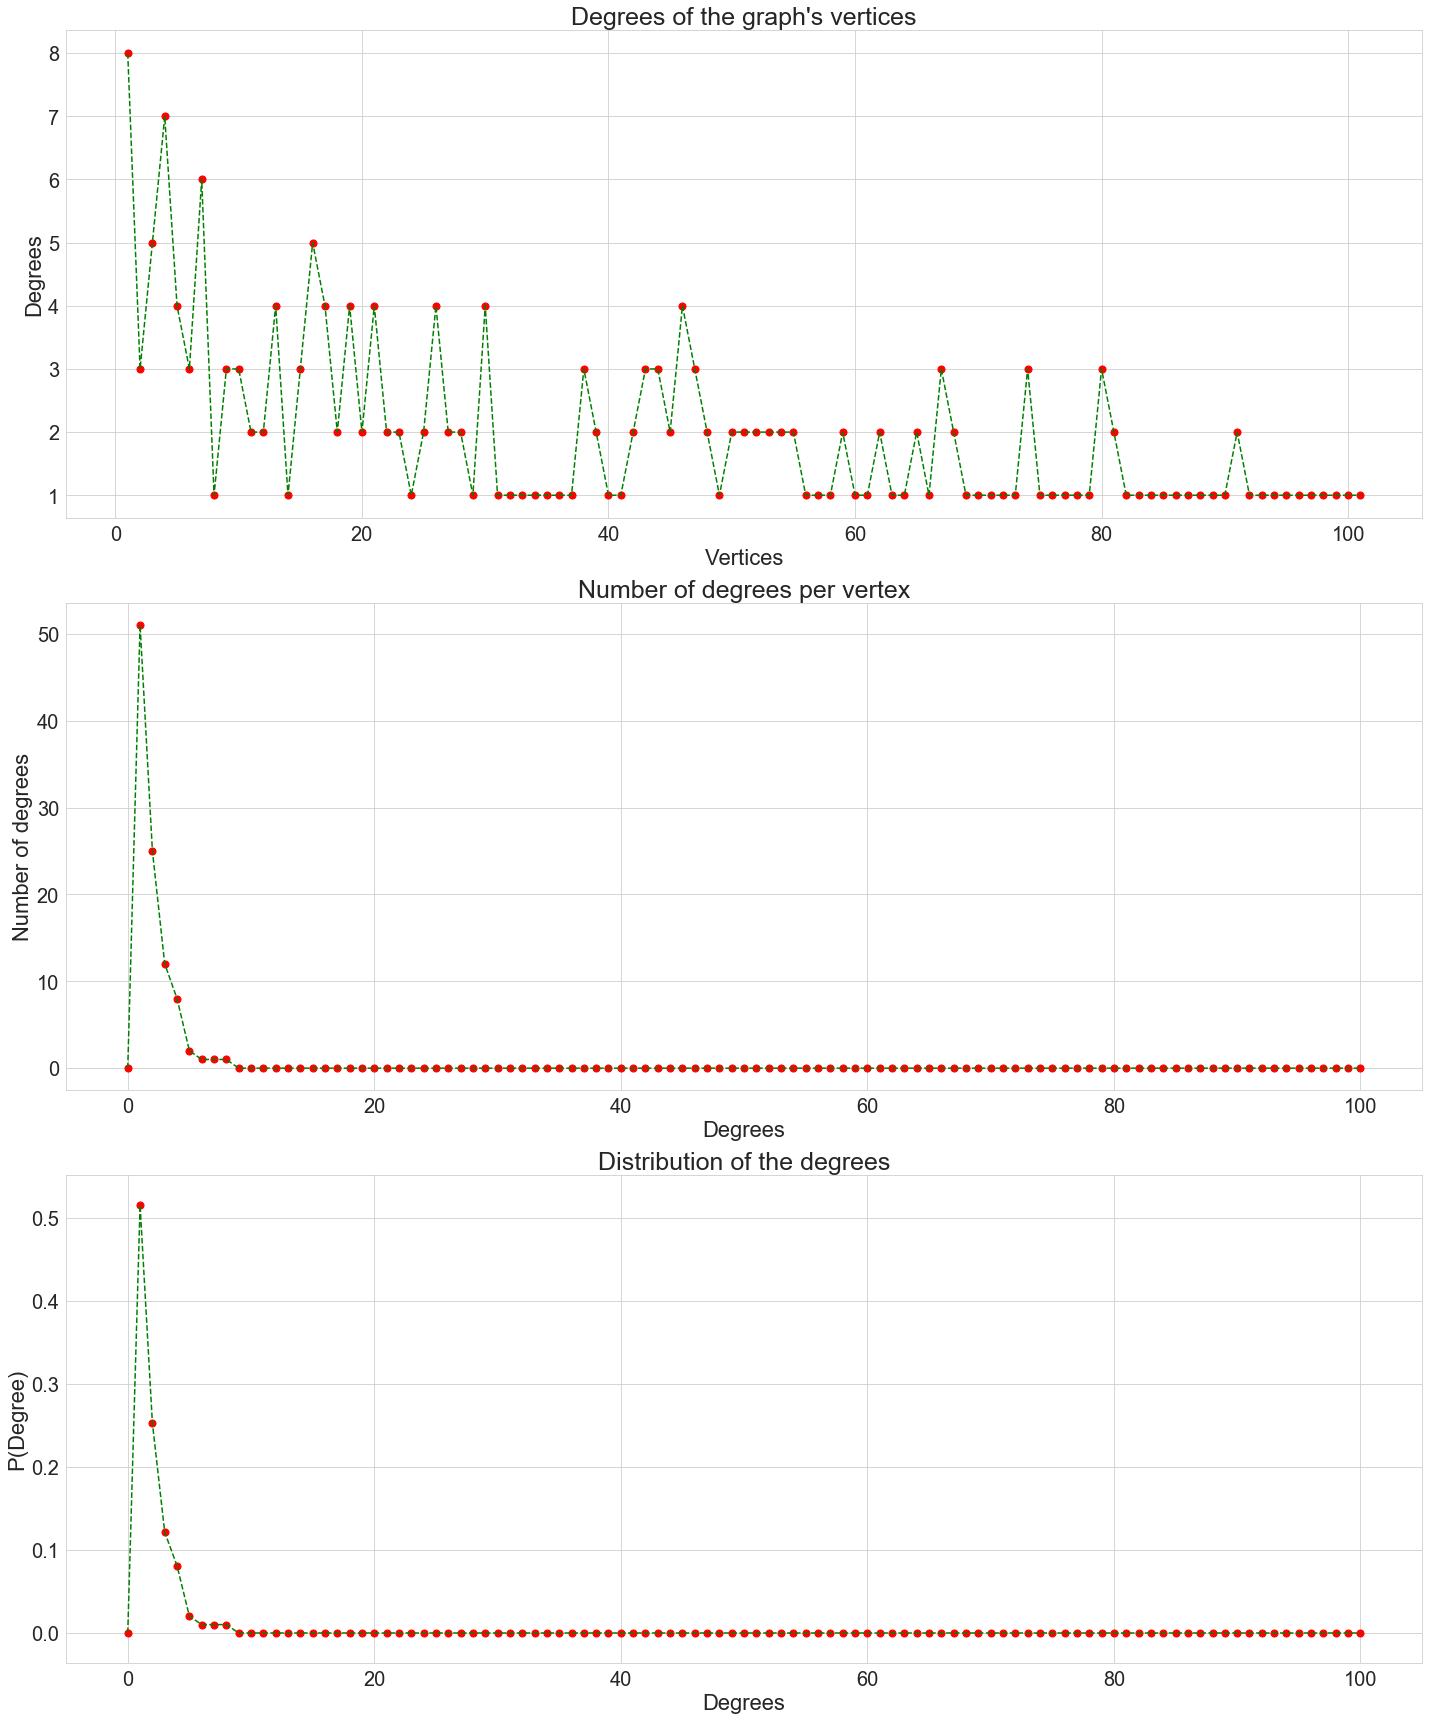

In [4]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

axes[0].scatter([k for k in range(1, n_edges_rrt+2)],
             count_rrt, color='red', s=scattersize)
axes[0].plot([k for k in range(1, n_edges_rrt+2)],
             count_rrt, color='green', linestyle='--')

axes[1].scatter([k for k in range(0, n_edges_rrt+1)],
                dist_rrt, color='red', s=scattersize)
axes[1].plot([k for k in range(0, n_edges_rrt+1)],
             dist_rrt, color='green', linestyle='--')

axes[2].scatter([k for k in range(0, n_edges_rrt+1)],
                dist_rrt/(n_edges_rrt-1), color='red', s=scattersize)
axes[2].plot([k for k in range(0, n_edges_rrt+1)],
             dist_rrt/(n_edges_rrt-1), color='green', linestyle='--')

axes[0].set_title('Degrees of the graph\'s vertices', fontsize=titlesize)
axes[1].set_title('Number of degrees per vertex', fontsize=titlesize)
axes[2].set_title('Distribution of the degrees', fontsize=titlesize)

axes[0].set_xlabel('Vertices', fontsize=axislabelsize)
axes[0].set_ylabel('Degrees', fontsize=axislabelsize)

axes[1].set_xlabel('Degrees', fontsize=axislabelsize)
axes[1].set_ylabel('Number of degrees', fontsize=axislabelsize)

axes[2].set_xlabel('Degrees', fontsize=axislabelsize)
axes[2].set_ylabel('P(Degree)', fontsize=axislabelsize)

for i in range(0, nrows):

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'rrt.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Mean degree of vertices

In [5]:
runs_rrt = 5000
degree_means_rrt = np.zeros((runs_rrt))

for i in range(0, runs_rrt):
    graph_rrt_current, count_rrt_current, dist_rrt_current = random_recursive_tree(n_edges_rrt)
    degree_means_rrt[i] = np.mean(graph_rrt_current)

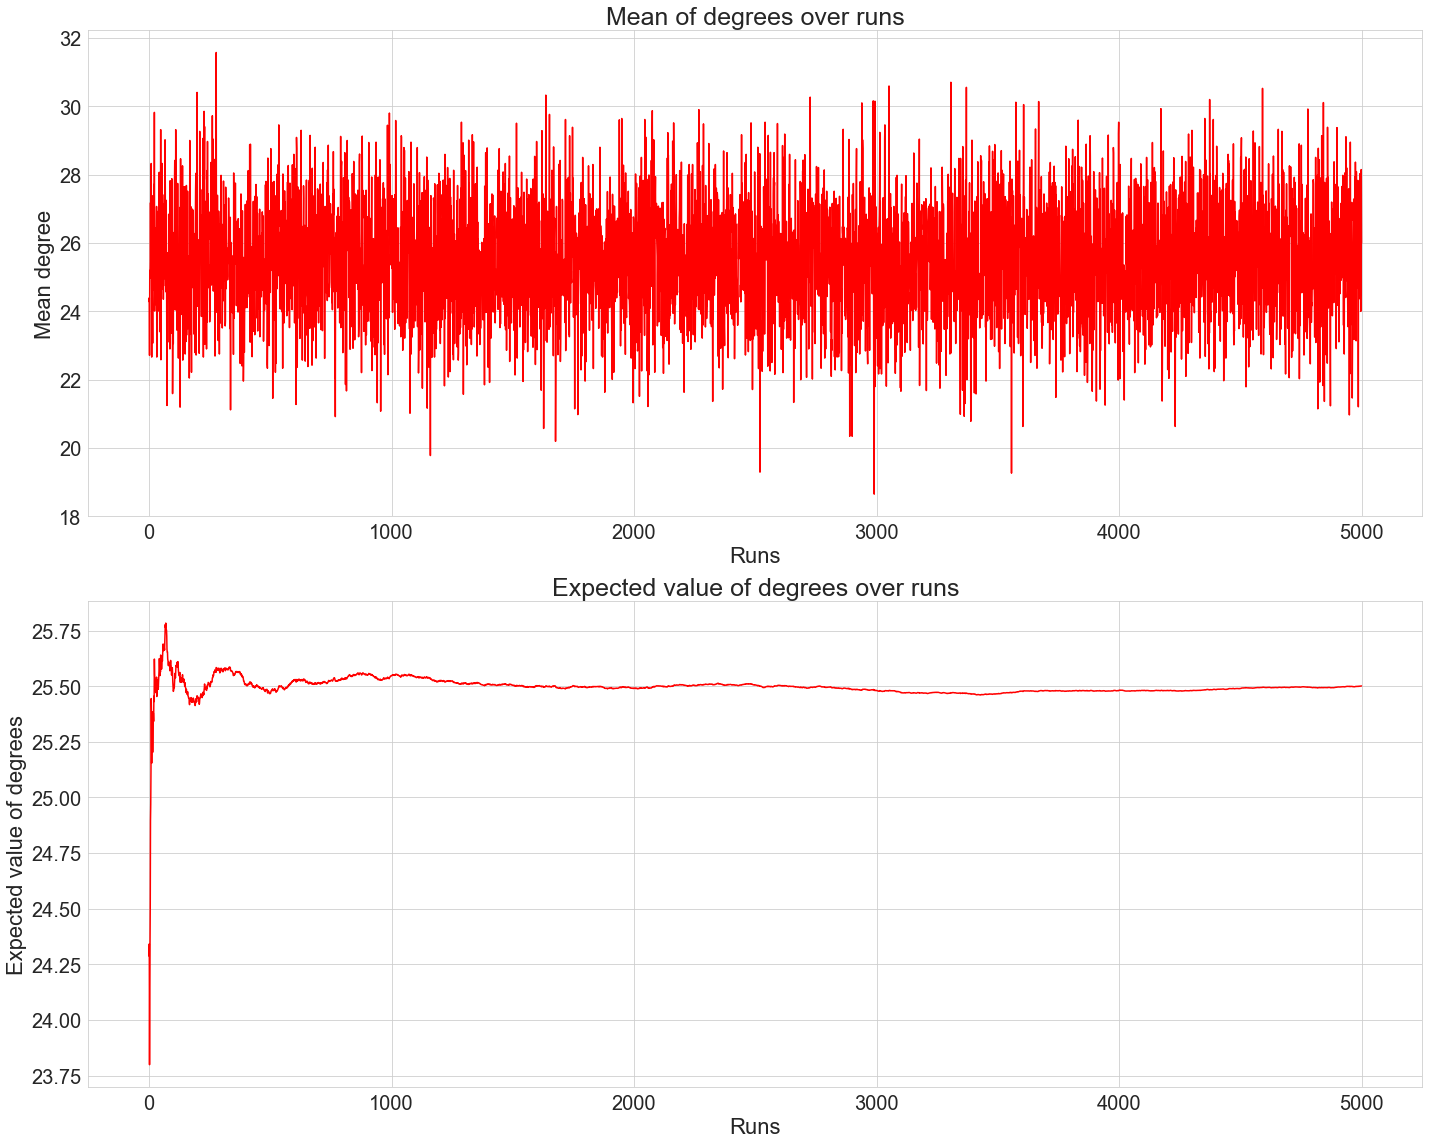

In [6]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20

axes[0].plot([k for k in range(0, runs_rrt)],
             degree_means_rrt, color='red')

axes[1].plot([k for k in range(0, runs_rrt)],
             [np.mean(degree_means_rrt[:k+1]) for k in range(0, runs_rrt)], color='red')

axes[0].set_title('Mean of degrees over runs', fontsize=titlesize)
axes[1].set_title('Expected value of degrees over runs', fontsize=titlesize)

axes[0].set_ylabel('Mean degree', fontsize=axislabelsize)
axes[1].set_ylabel('Expected value of degrees', fontsize=axislabelsize)

for i in range(0, nrows):
    axes[i].set_xlabel('Runs', fontsize=axislabelsize)
    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'rrt_mean.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

# Anti-Preferential Attachment Model (Anti-Barabási-Albert model)

In [7]:
def anti_pref_graph(n_edges_apm):
    
    # Storage for edges
    # Nth elements indicates the Nth edge
    # It connects the (N+2)th point with the point indicated by its value
    #
    # That means, that the first value of the graph_apm array, with index "0",
    # indicates the edge between the 1. and 2. points, and thus its value is "1."
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_apm+1)
    graph_apm = np.zeros((n_edges_apm+1), dtype='int')
    
    # Degrees of vertices
    # Nth elements indicates the degree of the (N+1)th point
    #
    # Points are indexed from "1", but the first point is indicated
    # by the "0" index of the count_apm array
    #
    # Length: Number of points, which equals to number of edges + 1 (n_edges_apm+1)
    count_apm = np.zeros((n_edges_apm+1), dtype='int')
    
    # Total number of vertices with specific degrees
    # Nth element indicates the number of vertices
    # with N degrees
    #
    # Length: Number of maximum possible degrees, which equals to number of edges (n_edges_apm)
    # +1 for zero degree
    dist_apm = np.zeros((n_edges_apm+1), dtype='int')
    
    # Initial conditions:
    # 2 points, with 1 connected edge
    graph_apm[0] = 1              # The second point is connected to the first one
    count_apm[0] = 1              # The first point has 1 degree
    count_apm[1] = 1              # The second point has 1 degree
    dist_apm[0] = n_edges_apm+1-2 # There are (total number of points - 2) points with 0 degree yet
    dist_apm[1] = 2               # There are two point with 1 degree yet

    count_edges = 1
    while(count_edges < n_edges_apm):
        
        # Choose an endpoint for the edge, brought into the graph by the new vertex
        # Anti-preferencial attachment process
        choosen_random = random.randint(1, count_edges+1)
        
        # Degree of choosen point
        choosen_degree = float(count_apm[choosen_random - 1])
        
        # Norm factor (A_norm)
        # A = sum_(l=1)^(N) l^(-2) * N_l
        A_norm = np.sum([dist_apm[k]*k**(-2) for k in range(1, n_edges_apm)])
        
        # Transistions rate (w_k)
        # w_k = k^(-2) / A
        w_current = choosen_degree**(-2) / A_norm
        
        if(w_current > random.random()):

            graph_apm[count_edges] = choosen_random

            # Increment the degrees of the two connected point
            count_apm[choosen_random - 1] += 1
            count_apm[count_edges + 1] += 1
            
            # Update distributions
            dist_apm[count_apm[choosen_random - 1]] += 1
            dist_apm[count_apm[count_edges + 1]] += 1
            dist_apm[count_apm[choosen_random - 1] - 1] -= 1
            dist_apm[count_apm[count_edges + 1] - 1] -= 1
            
            # Increment total number of edges
            count_edges += 1

    return(graph_apm, count_apm, dist_apm)

In [8]:
n_edges_apm = 100
graph_apm, count_apm, dist_apm = anti_pref_graph(n_edges_apm)

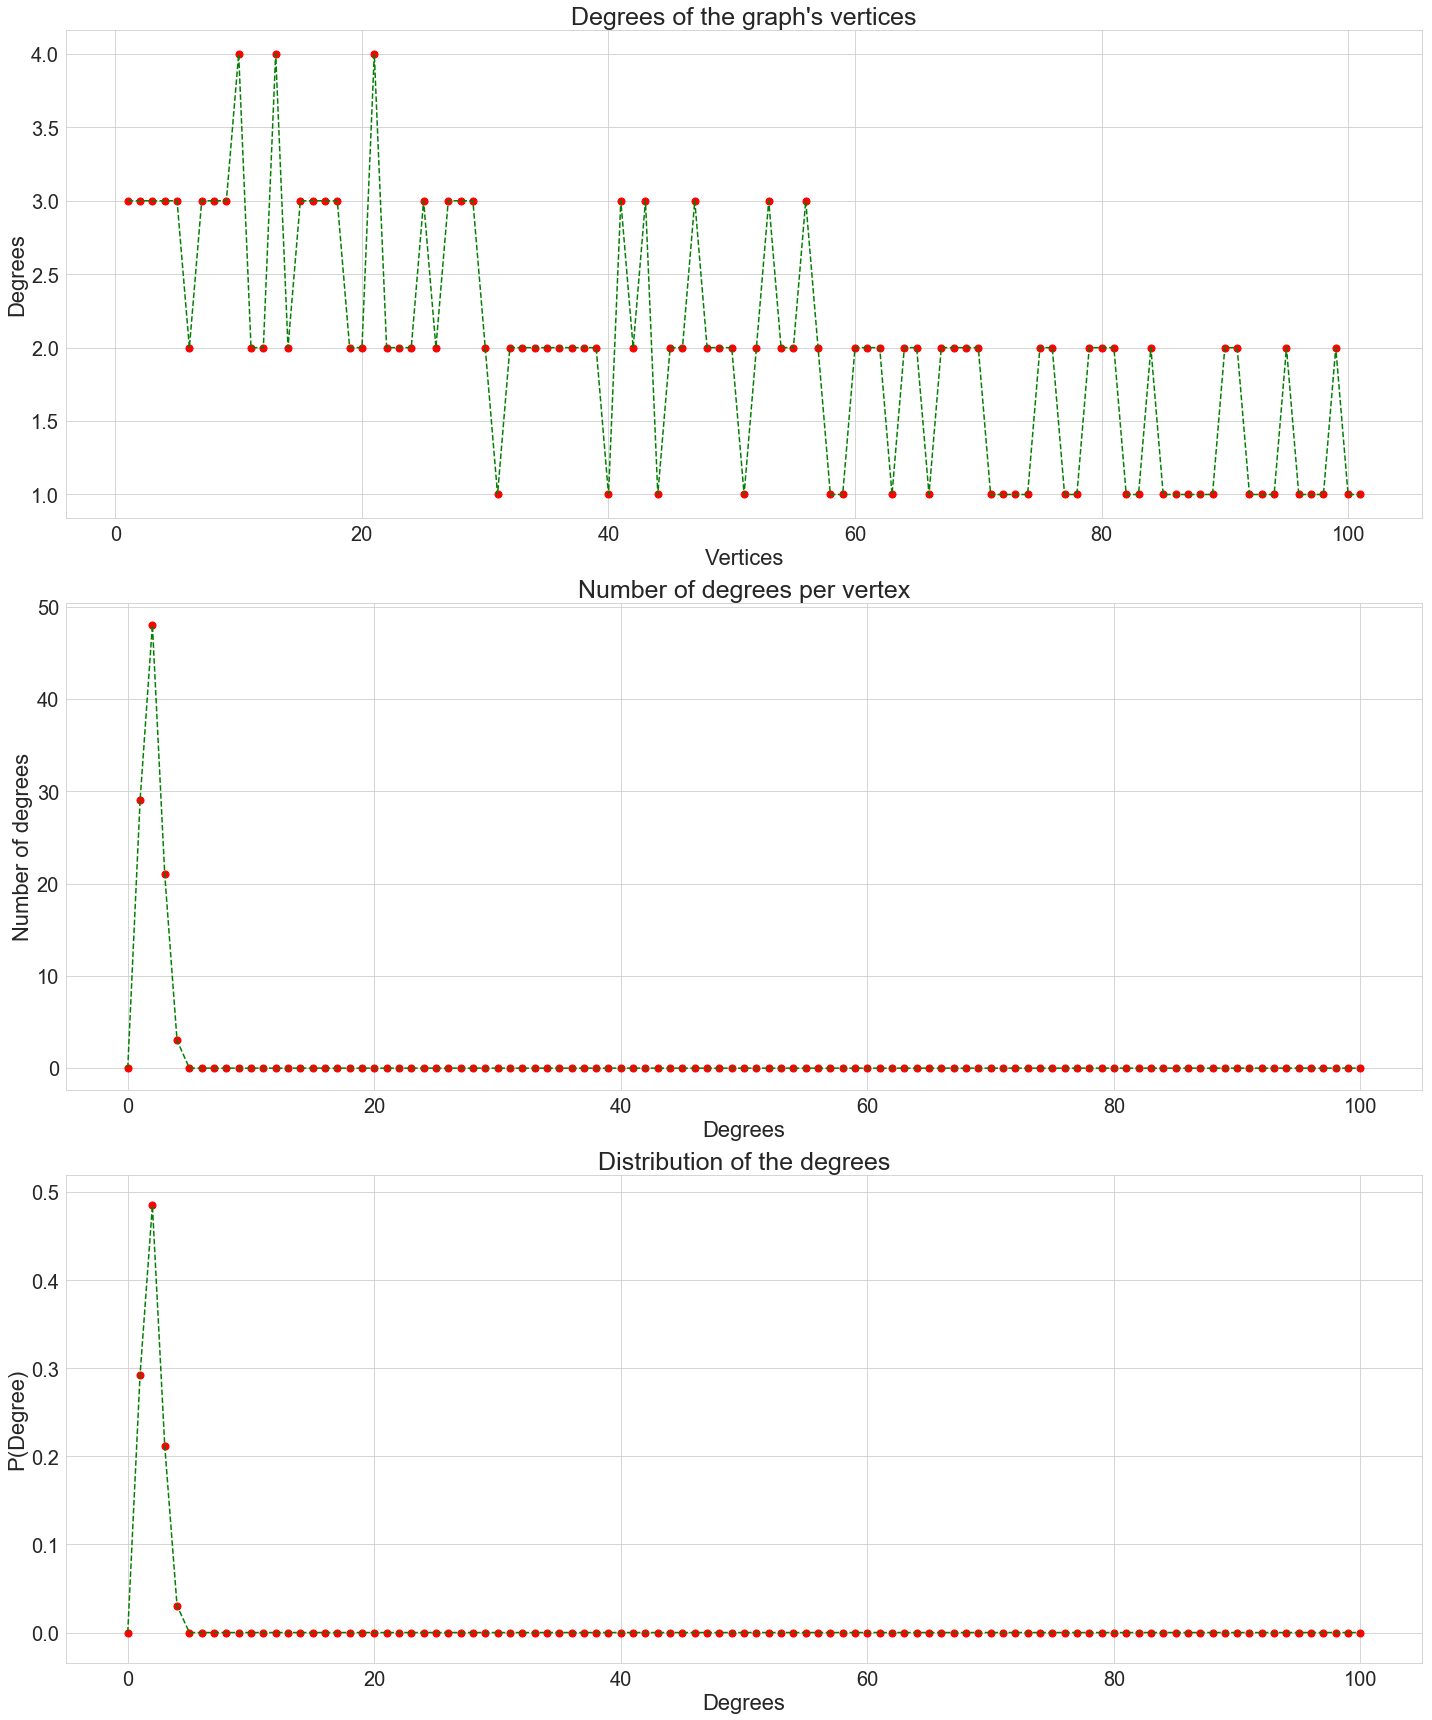

In [9]:
nrows = 3
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20
scattersize = 50

axes[0].scatter([k for k in range(1, n_edges_apm+2)],
             count_apm, color='red', s=scattersize)
axes[0].plot([k for k in range(1, n_edges_apm+2)],
             count_apm, color='green', linestyle='--')

axes[1].scatter([k for k in range(0, n_edges_apm+1)],
                dist_apm, color='red', s=scattersize)
axes[1].plot([k for k in range(0, n_edges_apm+1)],
             dist_apm, color='green', linestyle='--')

axes[2].scatter([k for k in range(0, n_edges_apm+1)],
                dist_apm/(n_edges_apm-1), color='red', s=scattersize)
axes[2].plot([k for k in range(0, n_edges_apm+1)],
             dist_apm/(n_edges_apm-1), color='green', linestyle='--')

axes[0].set_title('Degrees of the graph\'s vertices', fontsize=titlesize)
axes[1].set_title('Number of degrees per vertex', fontsize=titlesize)
axes[2].set_title('Distribution of the degrees', fontsize=titlesize)

axes[0].set_xlabel('Vertices', fontsize=axislabelsize)
axes[0].set_ylabel('Degrees', fontsize=axislabelsize)

axes[1].set_xlabel('Degrees', fontsize=axislabelsize)
axes[1].set_ylabel('Number of degrees', fontsize=axislabelsize)

axes[2].set_xlabel('Degrees', fontsize=axislabelsize)
axes[2].set_ylabel('P(Degree)', fontsize=axislabelsize)

for i in range(0, nrows):

    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'apm.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()

## Mean degree of vertices

In [10]:
runs_apm = 500
degree_means_apm = np.zeros((runs_apm))

for i in range(0, runs_apm):
    graph_apm_current, count_apm_current, dist_apm_current = anti_pref_graph(n_edges_apm)
    degree_means_apm[i] = np.mean(graph_apm_current)

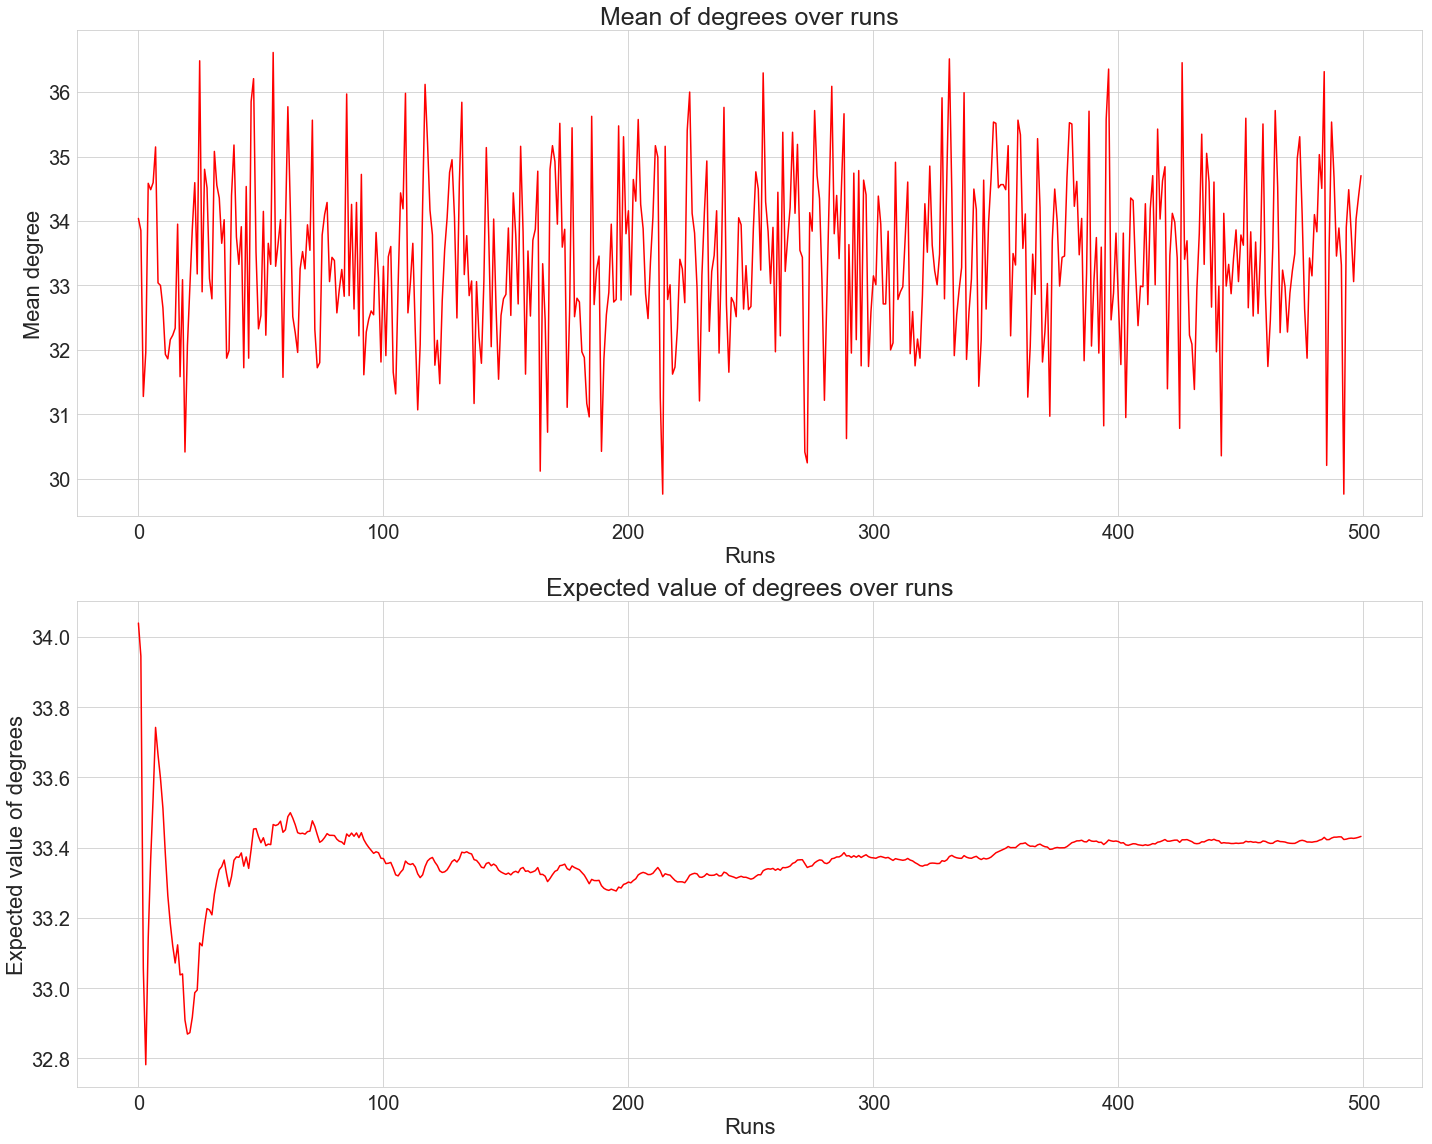

In [11]:
nrows = 2
ncols = 1
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*20,nrows*8))

titlesize = 25
axislabelsize = 22
axisticksize = 20

axes[0].plot([k for k in range(0, runs_apm)],
             degree_means_apm, color='red')

axes[1].plot([k for k in range(0, runs_apm)],
             [np.mean(degree_means_apm[:k+1]) for k in range(0, runs_apm)], color='red')

axes[0].set_title('Mean of degrees over runs', fontsize=titlesize)
axes[1].set_title('Expected value of degrees over runs', fontsize=titlesize)

axes[0].set_ylabel('Mean degree', fontsize=axislabelsize)
axes[1].set_ylabel('Expected value of degrees', fontsize=axislabelsize)

for i in range(0, nrows):
    axes[i].set_xlabel('Runs', fontsize=axislabelsize)
    axes[i].tick_params(axis='both', which='major', labelsize=axisticksize)

fig.tight_layout()
plt.savefig(image_path +
            'apm_mean.' +
            image_format,
            format=image_format,
            dpi=image_dpi,
            bbox_inches='tight')
plt.show()